# Compute Fourier Series Coefficients
## Consider various signals
## Coeffs computed by numerical integration 

In [1]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 42

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [2]:
KK = 8 # discrete plotting range
Krange = np.arange(-KK,KK+1,1)

## Ploting Functions


In [3]:
def compute_ck(T0,xftn):
    omega0 = 2*np.pi/T0
    tt = np.arange(0, T0, 1/10000)  # very fine time samples to compute cts signal
    x2 = lambda t,k: np.exp(-1j * k * omega0 * t) # exp
    prod = lambda t,k: xftn(t) * x2(t,k)/T0

    Cvalues = np.zeros((2*KK+1,1),dtype = 'complex_')
    for kk in Krange:
        Cvalues[KK+kk] = scipy.integrate.simps(prod(tt,kk), tt) # see page 7 of topic 6

    return Cvalues

def plot_fourier_coeffs(T0,x,Cvals):
    plot_tt = np.arange(-3*T0, 3*T0, 1/100)  # the time samples
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8), dpi=150)
    ax1.plot(plot_tt, x(plot_tt), 'k-', lw=2)
    ax1.set_title('Function')
    ax1.set_ylabel('$x(t)$')
    ax1.set_xlabel('$t$')
    ax1.grid(True, which='major', color='#666666', linestyle='-')
    ax1.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax1.minorticks_on()
    
    markerline, stemlines, baseline = ax2.stem(Krange, np.abs(Cvals), 'b-', use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 3)
    ax2.set_xlabel('k')
    ax2.set_title('Fourier Coefficients')
    ax2.set_ylabel('$|c_k|$')
    ax2.set_ylim(0,0.7)
    plt.tight_layout()
    ax2.grid(True, which='major', color='#666666', linestyle='-')
    ax2.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    ax2.minorticks_on()
    plt.show()

## Cosine

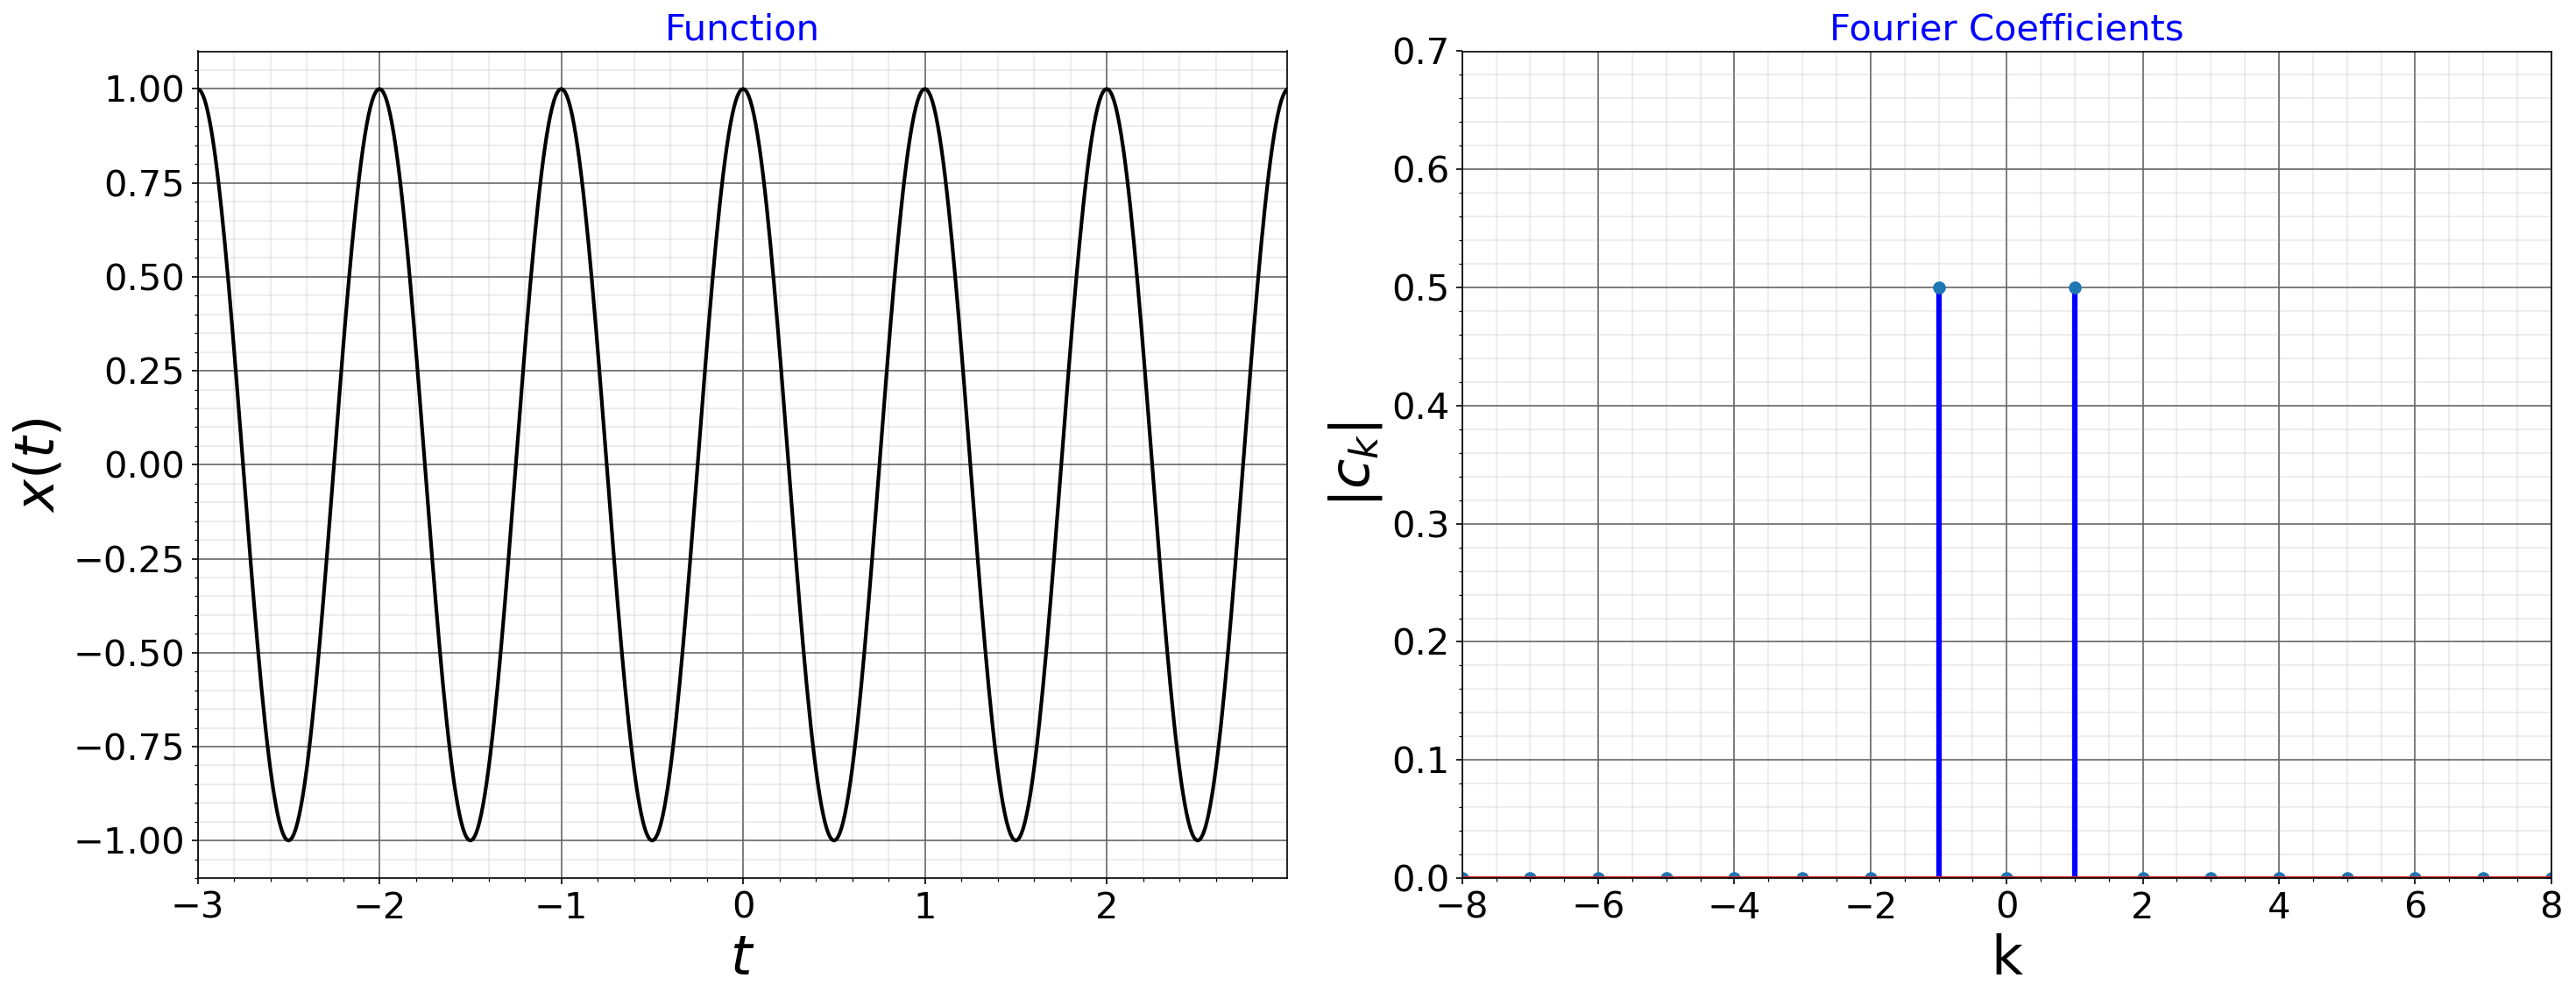

In [4]:
T0 = 1
x1 = lambda t: np.cos(2*np.pi*t/T0)  
C_ex1 = compute_ck(T0,x1)
plot_fourier_coeffs(T0,x1,C_ex1)

## Sine

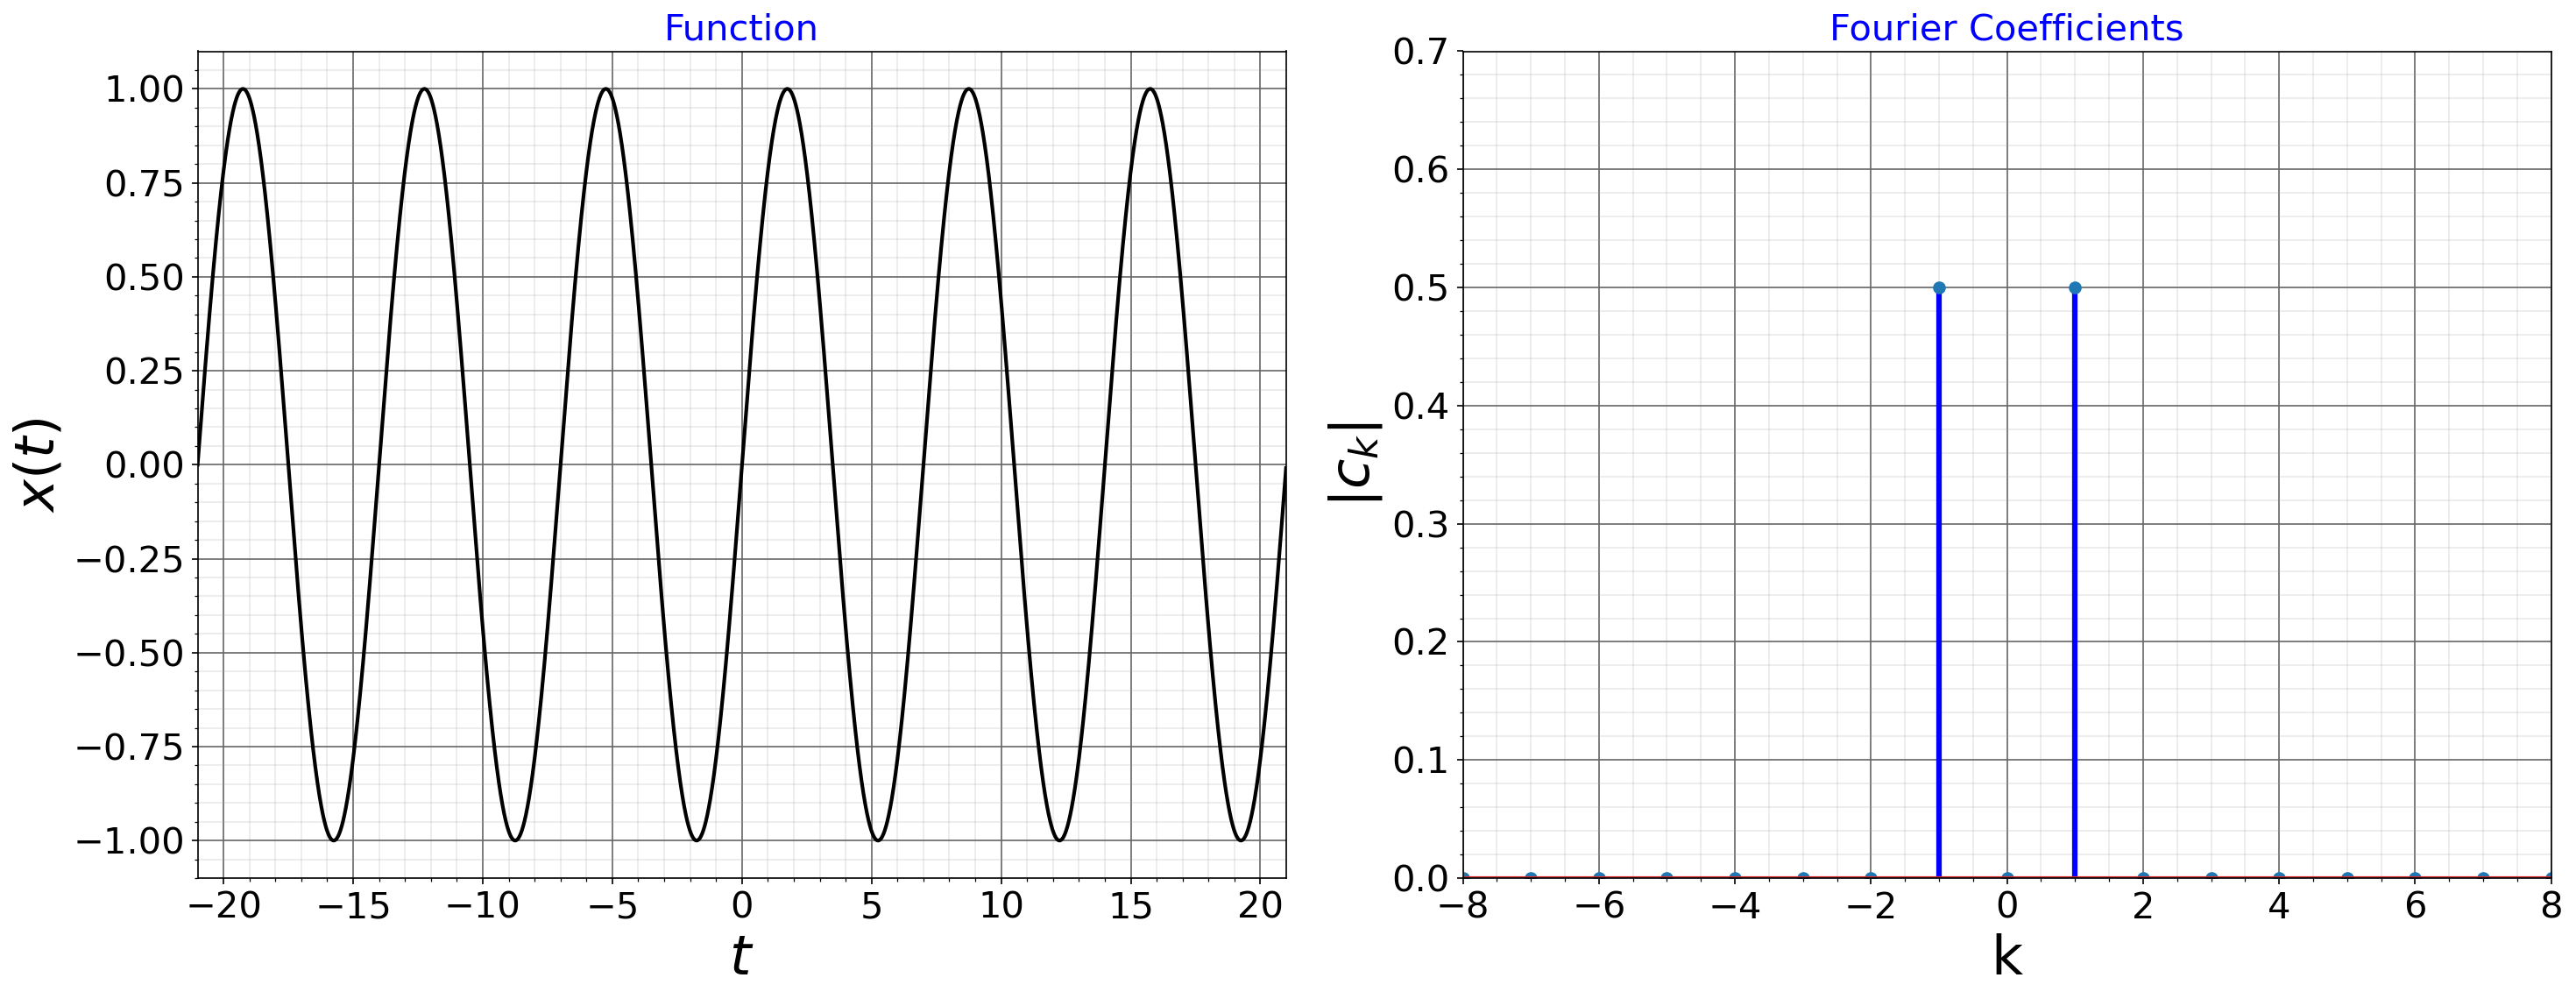

In [5]:
T0 = 7
x2 = lambda t: np.sin(2*np.pi*t/T0)  
C_ex2 = compute_ck(T0,x2)
plot_fourier_coeffs(T0,x2,C_ex2)

## Multiple Cosines

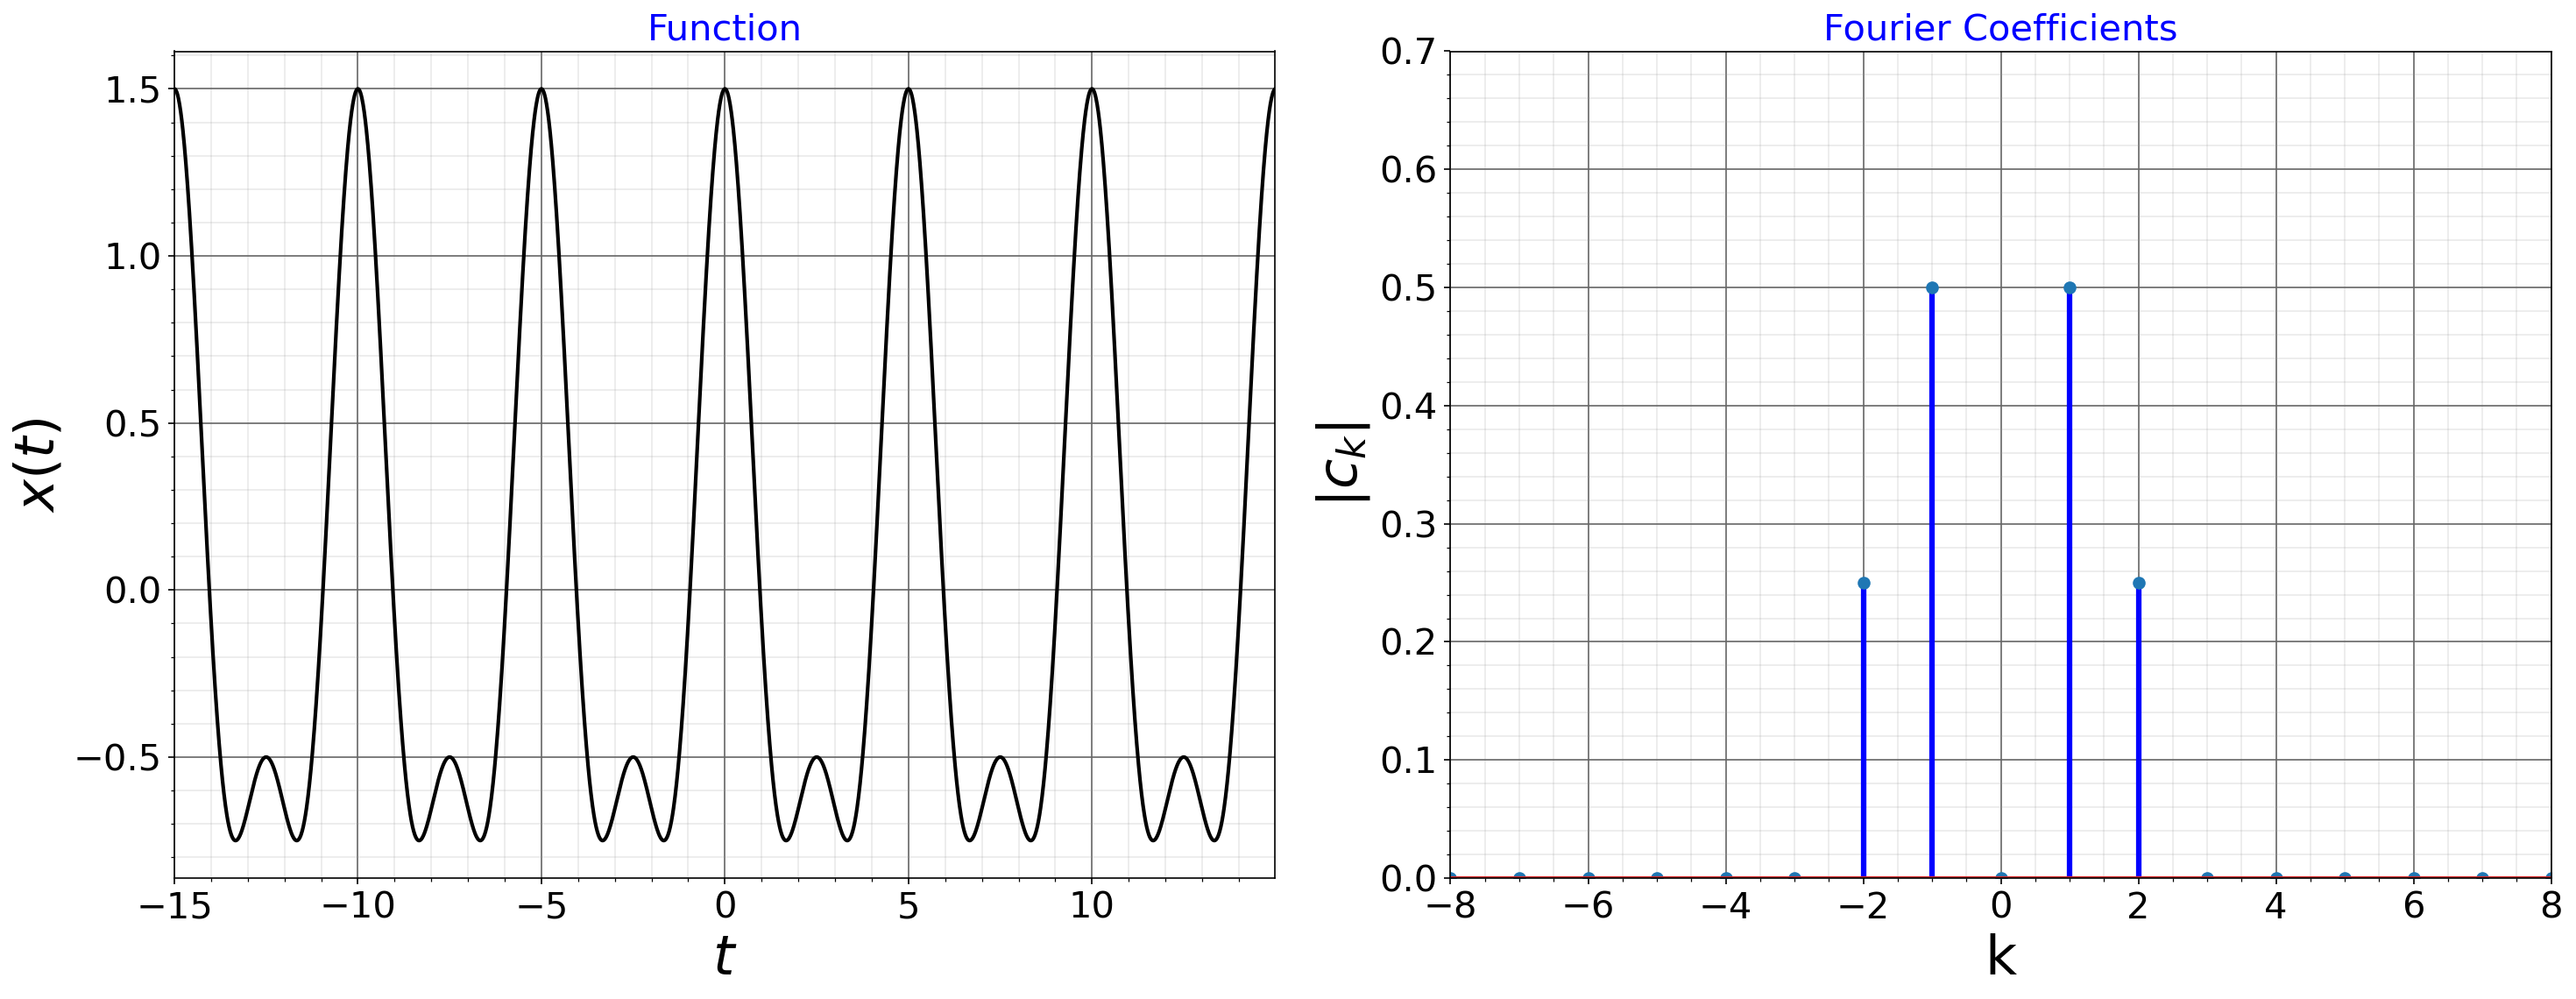

In [6]:
T0 = 5
x3 = lambda t: np.cos(2*np.pi*t/T0) + 0.5*np.cos(4*np.pi*t/T0)  
C_ex3 = compute_ck(T0,x3)
plot_fourier_coeffs(T0,x3,C_ex3)

## Square Wave

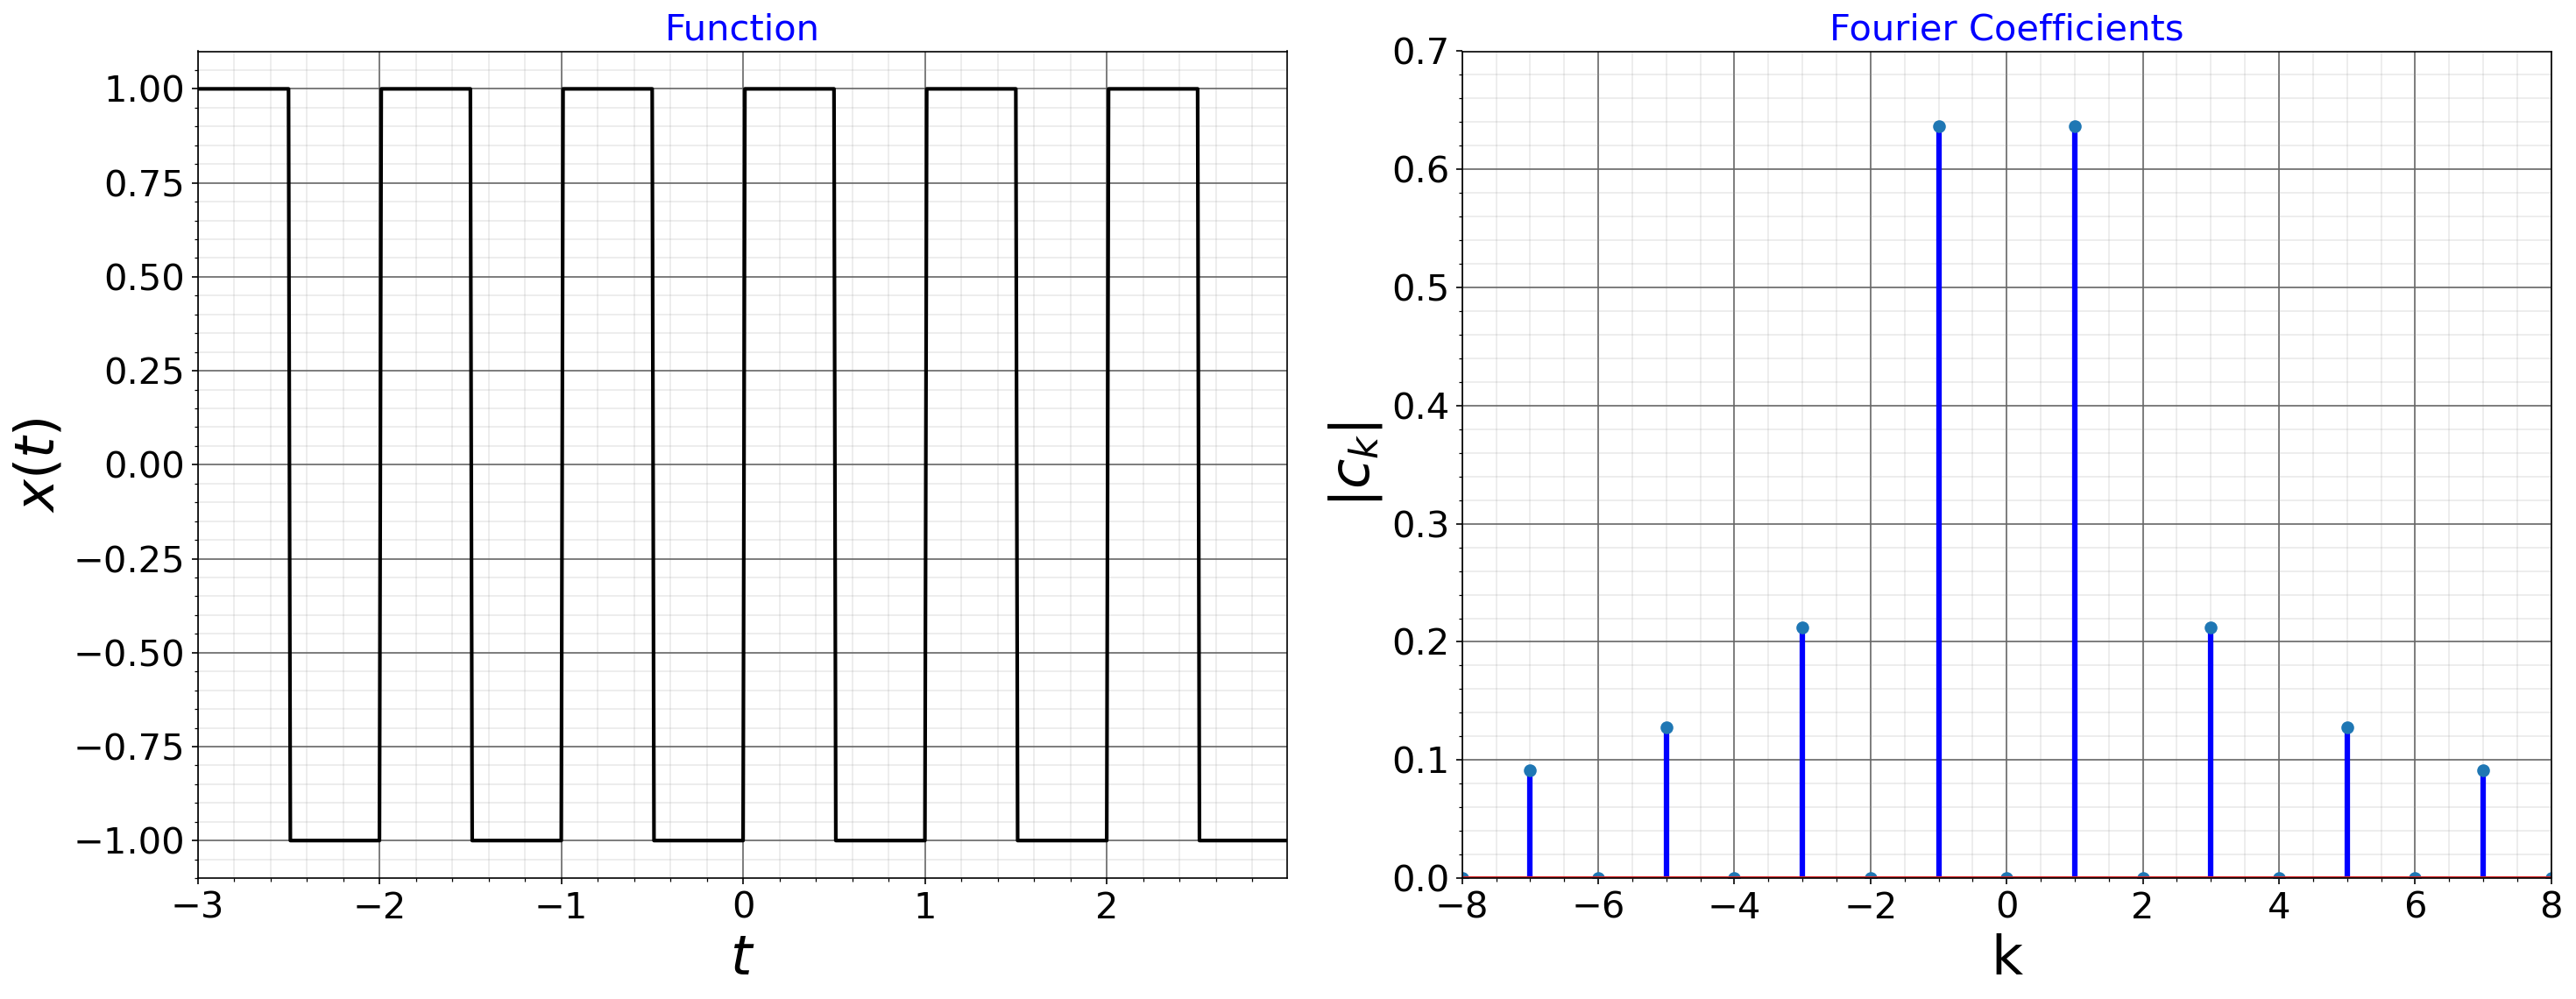

In [7]:
T0 = 1
x4 = lambda t: signal.square(2 * np.pi * t/ T0)  
C_ex4 = compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4)

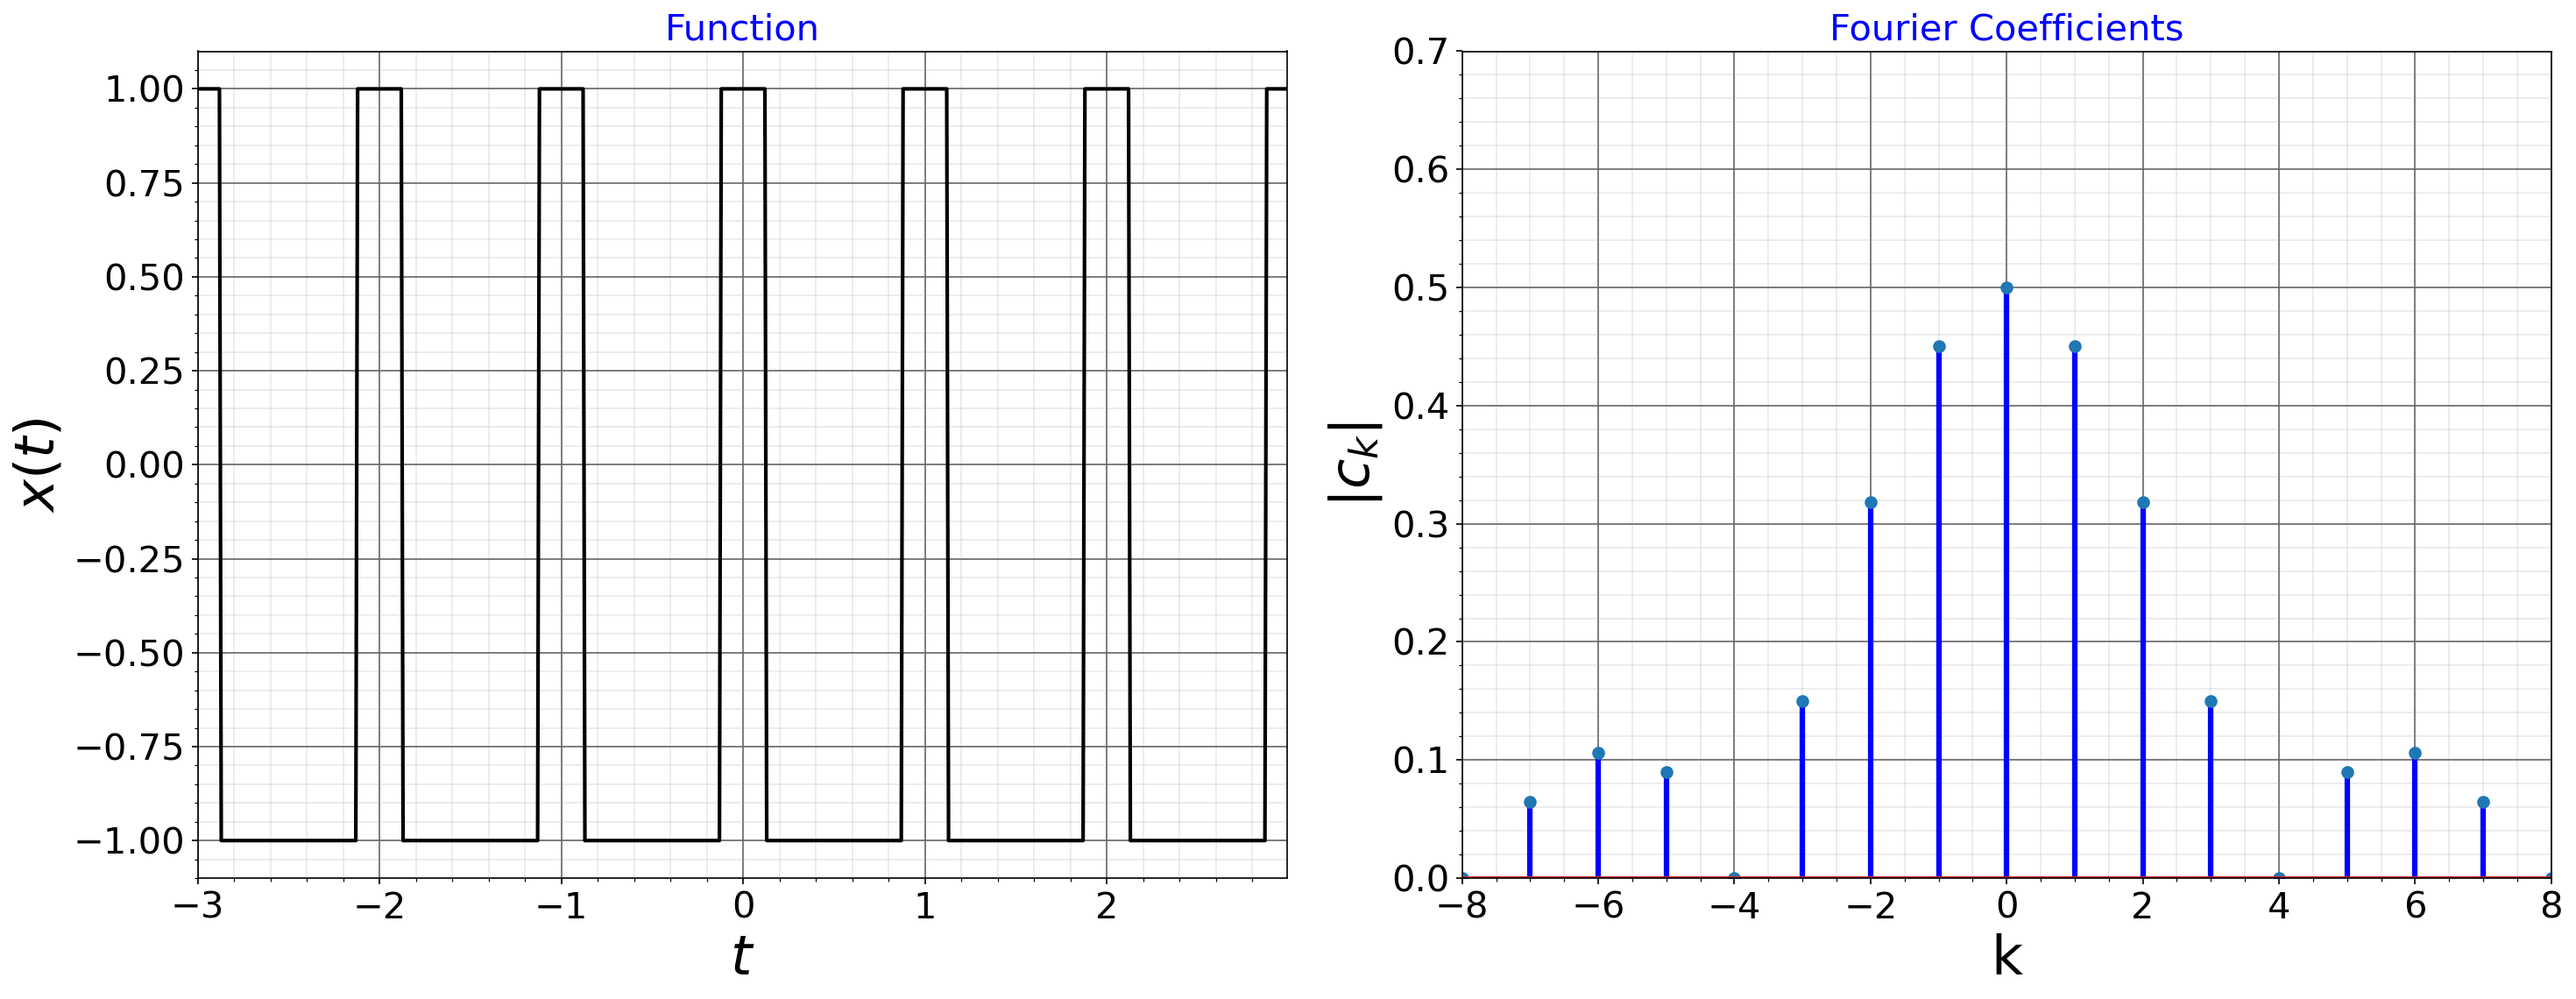

In [8]:
T0 = 1
x5 = lambda t: signal.square(2 * np.pi * t/ T0 + np.pi/4, duty = 0.25)  
C_ex5 = compute_ck(T0,x5)
plot_fourier_coeffs(T0,x5,C_ex5)